# ANDES Demonstration of DGPRCT1 on IEEE 14-Bus System

Prepared by Jinning Wang. Last revised 12 September 2021.

## Background

One load adjustment scenario is used to demonstrate `DGPRCT1`.

In the modified IEEE 14-bus system, 10 PVD1 are conencted to `Bus 4`, and 1 DGPRCT1 is added aiming at `PVD1_2`.

## Conclusion

`DGPRCT1` can be used to implement protection on `DG` models.

In [1]:
import andes
from andes.utils.paths import get_case

andes.config_logger(stream_level=30)

In [2]:
ss = andes.load(get_case('ieee14/ieee14_dgprct1.xlsx'),
                setup=False,
                no_output=True,
                default_config=True)

In [3]:
ss.setup()

True

In [4]:
# use constant power model for PQ
ss.PQ.config.p2p = 1
ss.PQ.config.q2q = 1
ss.PQ.config.p2z = 0
ss.PQ.config.q2z = 0

# turn off under-voltage PQ-to-Z conversion
ss.PQ.pq2z = 0
ss.PFlow.run()

True

In [5]:
ss.PVD1.Iqcmd.lim.allow_adjust

False

In [6]:
ss.TDS.config.tf = 20
ss.TDS.run()

<Toggle 1>: StaticLoad.PQ_12 status changed to 1 at t=1.0 sec.       
<Toggle 2>: StaticLoad.PQ_12 status changed to 0 at t=10.0 sec.      
100%|████████████████████████████████| 100/100 [00:02<00:00, 42.98%/s]


True

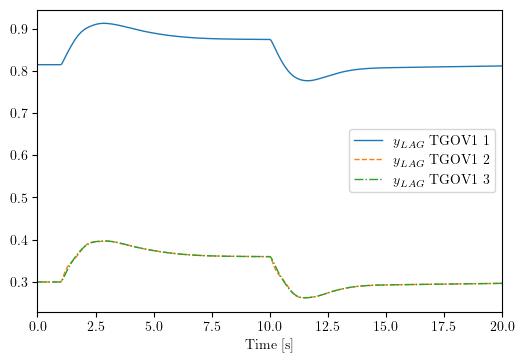

(<Figure size 600x400 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [7]:
ss.TDS.plt.plot(ss.TGOV1.LAG_y)

In [8]:
ss.exit_code

0

## Results

### System frequency and lock flag

The lock flag is raised at `Tfl1` after the frequency drop below `fl1`

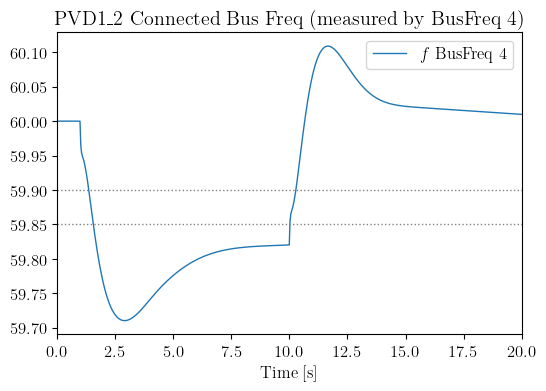

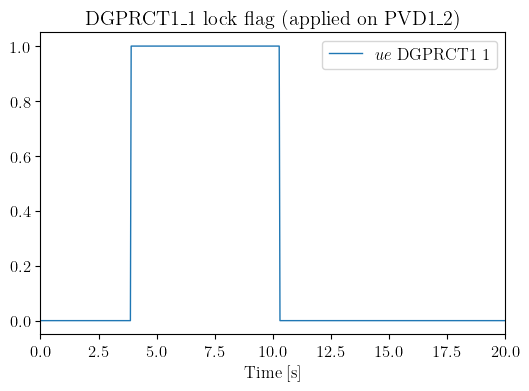

(<Figure size 600x400 with 1 Axes>,
 <AxesSubplot:title={'center':'DGPRCT1\\_1 lock flag (applied on PVD1\\_2)'}, xlabel='Time [s]'>)

In [9]:
ss.TDS.plt.plot(ss.BusFreq.f,
                a=(3),
                ycalc=lambda x: 60*x,
                hline=[ss.DGPRCT1.fl1.v[0], ss.DGPRCT1.fl2.v[0]],
                title='PVD1\_2 Connected Bus Freq (measured by BusFreq 4)')

ss.TDS.plt.plot(ss.DGPRCT1.ue,
                title='DGPRCT1\_1 lock flag (applied on PVD1\_2)')

### PVD1_2 read frequency and frequency signal source

The `PVD1_2` read frequency is locked, but the signal source (in the `BusFreq 4`) remains unchanged

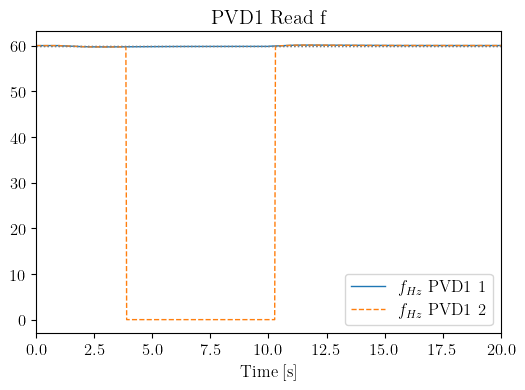

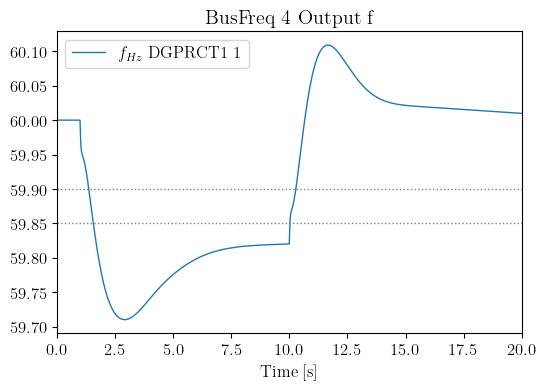

(<Figure size 600x400 with 1 Axes>,
 <AxesSubplot:title={'center':'BusFreq 4 Output f'}, xlabel='Time [s]'>)

In [10]:
ss.TDS.plt.plot(ss.PVD1.fHz,
                a=(0,1),
                hline=[ss.DGPRCT1.fl1.v[0], ss.DGPRCT1.fl2.v[0]],
                title='PVD1 Read f')

ss.TDS.plt.plot(ss.DGPRCT1.fHz,
                hline=[ss.DGPRCT1.fl1.v[0], ss.DGPRCT1.fl2.v[0]],
                title='BusFreq 4 Output f',
                )

### PVD1_2 power command

`PVD1_2` power commands are locked to 0 **immediately**.

Once the protection was released, they returned to normal **immediately**.

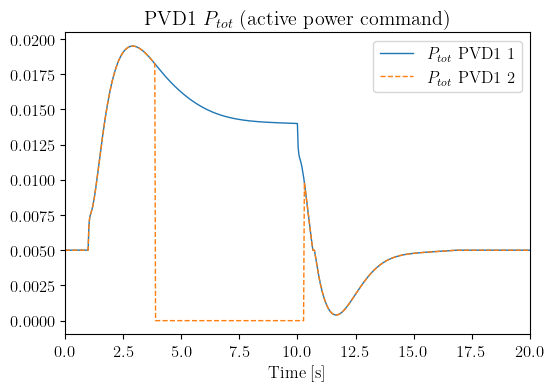

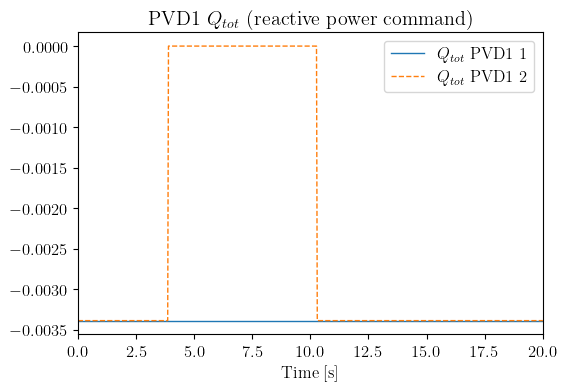

(<Figure size 600x400 with 1 Axes>,
 <AxesSubplot:title={'center':'PVD1 $Q_{tot}$ (reactive power command)'}, xlabel='Time [s]'>)

In [11]:
ss.TDS.plt.plot(ss.PVD1.Psum,
                a=(0,1),
                title='PVD1 $P_{tot}$ (active power command)')

ss.TDS.plt.plot(ss.PVD1.Qsum,
                a=(0,1),
                title='PVD1 $Q_{tot}$ (reactive power command)')

### PVD1_2 current command

Consequently, `PVD1_2` current commands are locked to 0 **immediately**.

Once the protection was released, they returned to normal **immediately**.

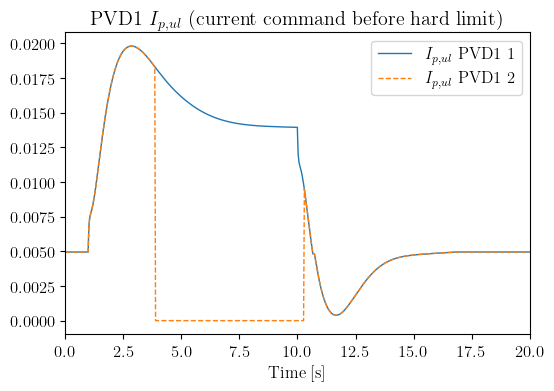

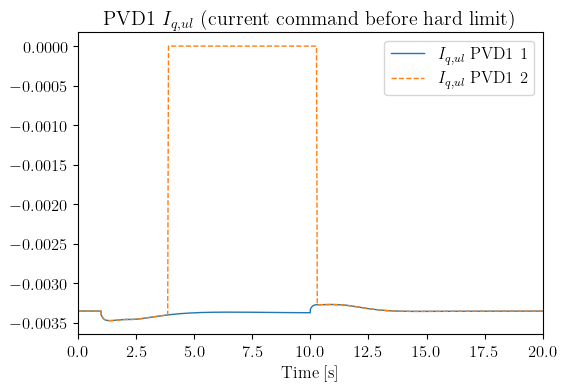

(<Figure size 600x400 with 1 Axes>,
 <AxesSubplot:title={'center':'PVD1 $I_{q,ul}$ (current command before hard limit)'}, xlabel='Time [s]'>)

In [12]:
ss.TDS.plt.plot(ss.PVD1.Ipul,
                a=(0,1),
                title='PVD1 $I_{p,ul}$ (current command before hard limit)')

ss.TDS.plt.plot(ss.PVD1.Iqul,
                a=(0,1),
                title='PVD1 $I_{q,ul}$ (current command before hard limit)')

### PVD1_2 output current

As a result, `PVD1_2` output current decreased to 0 **gradually**.

When the protection was released, they returned to normal **gradually**.

Here, the `PVD1` output current `Lag` time constant (`tip` and `tiq`) are modified to 0.5, which is only for observation.

Usually, power electronic device can response in ms level.

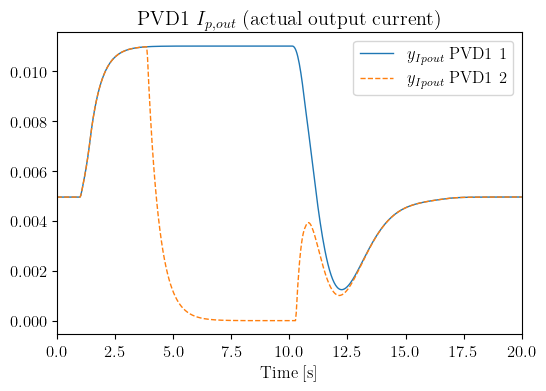

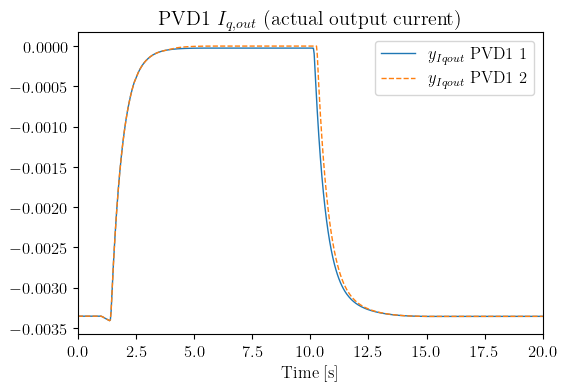

(<Figure size 600x400 with 1 Axes>,
 <AxesSubplot:title={'center':'PVD1 $I_{q,out}$ (actual output current)'}, xlabel='Time [s]'>)

In [13]:
ss.TDS.plt.plot(ss.PVD1.Ipout_y,
                a=(0,1),
                title='PVD1 $I_{p,out}$ (actual output current)')

ss.TDS.plt.plot(ss.PVD1.Iqout_y,
                a=(0,1),
                title='PVD1 $I_{q,out}$ (actual output current)')

## Cleanup

In [14]:
!andes misc -C


    _           _         | Version 1.5.7.post29.dev0+g8b9dfdff
   /_\  _ _  __| |___ ___ | Python 3.9.7 on Linux, 12/14/2021 05:17:41 PM
  / _ \| ' \/ _` / -_|_-< | 
 /_/ \_\_||_\__,_\___/__/ | This program comes with ABSOLUTELY NO WARRANTY.

No output file found in the working directory.
